In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
training = pd.read_csv('train.csv')
testing = pd.read_csv('test.csv')

In [5]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
"""
# 1) For numeric data
"""
df_numerical = training[['Age', 'SibSp','Parch', 'Fare']]

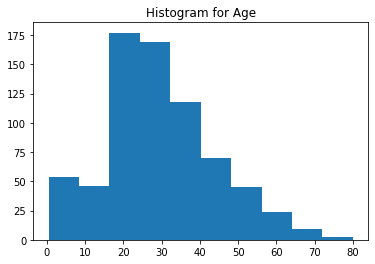

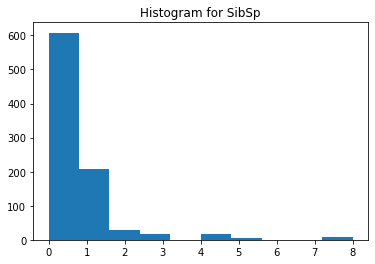

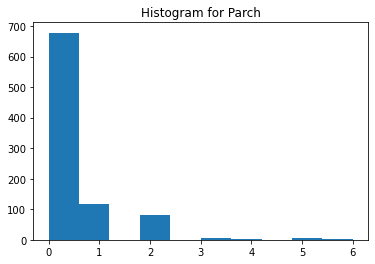

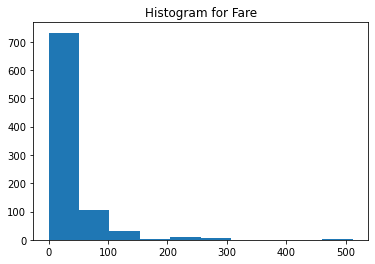

In [7]:
# Made histograms to understand distributions
for i in df_numerical.columns:
    plt.hist(df_numerical[i])
    plt.title("Histogram for "+ i)
    plt.show()

Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


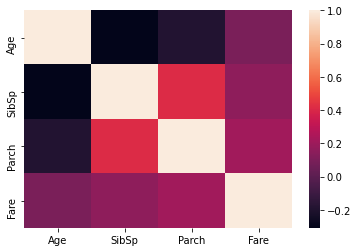

In [8]:
# correlation plot
# really important 'cause we want to avoid multicolinearity 
numerical_corr = df_numerical.corr()
print(numerical_corr )
sns.heatmap(numerical_corr)


In [9]:
# Pivot table comparing survival rate across numeric variables (Age, SibSp, Parch, and Fare )
# getting average values
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


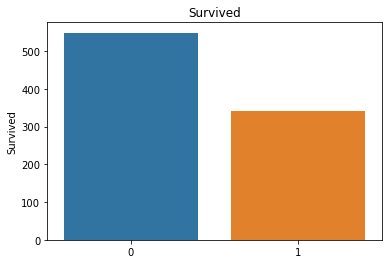

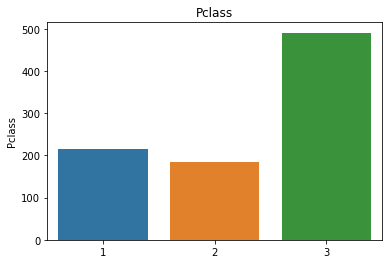

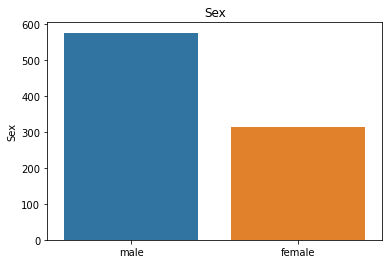

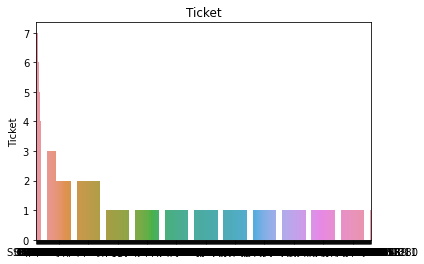

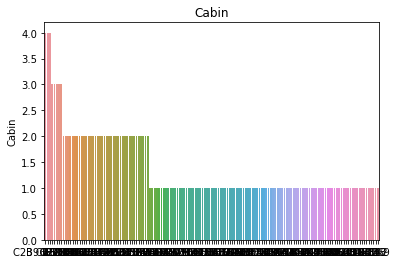

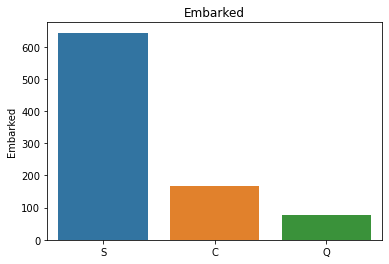

In [10]:
"""
2) For Categorical Data

"""

df_categorical = training[['Survived', 'Pclass', 'Sex' , 'Ticket', 'Cabin', 'Embarked']]
# Made bar charts to understand balance of classes
for i in df_categorical.columns:
    df_categ_counts = df_categorical[i].value_counts()
    sns.barplot(df_categ_counts.index , df_categ_counts ).set_title(i)
    plt.show()


In [12]:
df_categorical['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F2             3
F33            3
              ..
C87            1
E34            1
C118           1
F E69          1
C82            1
Name: Cabin, Length: 147, dtype: int64

In [13]:
# Made pivot tables to understand relationship with survival
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Name' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Name' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Name' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [15]:
# Explore interesting themes 
    # Wealthy survive? 
    # By location 
    # Age scatterplot with ticket price 
    # Young and wealthy Variable? 
    # Total spent? 

In [16]:
""" Feature engineering """

' Feature engineering '

In [17]:
#1) Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or
#    the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)

df_categorical['Cabin']
training['cabin_multiple'] = training['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this  letters 
training['cabin_multiple']
# multiple letters 
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [18]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [19]:
#creates categories based on the cabin letter (n stands for null)
#in this case we will treat null values like it's own category

training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])
training['cabin_adv'] 

#comparing surivial rate by cabin
print(training.cabin_adv.value_counts())
pd.pivot_table(training,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [20]:
#understand ticket values better 
#numeric vs non numeric 
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['letters_ticket'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

training['numeric_ticket'].value_counts()
training['letters_ticket'].value_counts() 

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
swpp           2
ppp            2
scah           2
sotono2        2
fa             1
sp             1
sca4           1
sop            1
sc             1
casoton        1
scahbasle      1
fc             1
scow           1
as             1
Name: letters_ticket, dtype: int64

In [21]:
#2) Tickets - Do different ticket types impact survival rates?
#difference in numeric vs non-numeric tickets in survival rate 

pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

#survival rate across different tyicket types 
pd.pivot_table(training,index='Survived',columns='letters_ticket', values = 'Ticket', aggfunc='count')

letters_ticket,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [22]:
#3) Does a person's title relate to survival rates?
training.Name.head(50)
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
#mr., ms., master. etc
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Mme               1
Don               1
Lady              1
Sir               1
the Countess      1
Capt              1
Ms                1
Jonkheer          1
Name: name_title, dtype: int64

In [ ]:
"""
DATA PREPROCESSING FOR BUILDING THE MODEL
1) Drop null values from Embarked (only 2)
2) Include only relevant variables (Since we have limited data, I wanted to exclude things like name and passanger ID so that we could have a reasonable number of features for our models to deal with)
Variables: 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title'

3) Do categorical transforms on all data. Usually we would use a transformer, but with this approach we can ensure that our traning and test data have the same colums. We also may be able to infer something about the shape of the test data through this method. I will stress, this is generally not recommend outside of a competition (use onehot encoder).
4) Impute data with mean for fare and age (Should also experiment with median)
5) Normalized fare using logarithm to give more semblance of a normal distribution
6) Scaled data 0-1 with standard scaler
"""